In [1]:
# Data management
import pandas as pd
import numpy as np

# Models
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Visualitation
import seaborn as sns
import matplotlib.pyplot as plt

# Save
import joblib

# The problem
We are faced with the problem of estimating whether the current price for a room on Airbnb is 

over or under the market price, so we will analyze and select a model that helps us predict said price.

# Import data

In [2]:
# Data to train
train_data_raw = pd.read_csv("../data_raw/train.csv")
# Data to test
test_data_raw = pd.read_csv("../data_raw/test.csv")

# EDA

Now we will analyze the variables of our data


In [3]:
train_data_raw.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [4]:
train_data_raw.shape
print(f"Number rows: {train_data_raw.shape[0]} Number columns: {train_data_raw.shape[1]}")

Number rows: 74111 Number columns: 29


Type variables

In [5]:
train_data_raw.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

In [6]:
train_data_raw.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [7]:
train_data_raw.describe(include=[object, bool])

,property_type,room_type,amenities,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,name,neighbourhood,thumbnail_url,zipcode
count,74111,74111,74111,74111,74111,74111,74111,74111,58247,73923,73923,55812,73923,74111,58284,74111,67239,65895,73145
unique,35,3,67122,5,5,2,6,73479,2554,2,2,80,3087,2,1371,73359,619,65883,769
top,Apartment,Entire home/apt,{},Real Bed,strict,True,NYC,"Hello, I've been running guest house for Korea...",2017-01-01,t,t,100%,2015-03-30,f,2017-04-30,Bunk bed in the Treat Street Clubhouse,Williamsburg,https://a0.muscache.com/im/pictures/70087089/b...,11211.0
freq,49003,41310,586,72028,32374,54403,32349,8,293,73697,49748,43254,246,54660,1344,8,2862,3,1368


In [8]:
# Number of NAs by column
train_data_raw.isna().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

Text(0.5, 1.0, 'NAs ratio per Column')

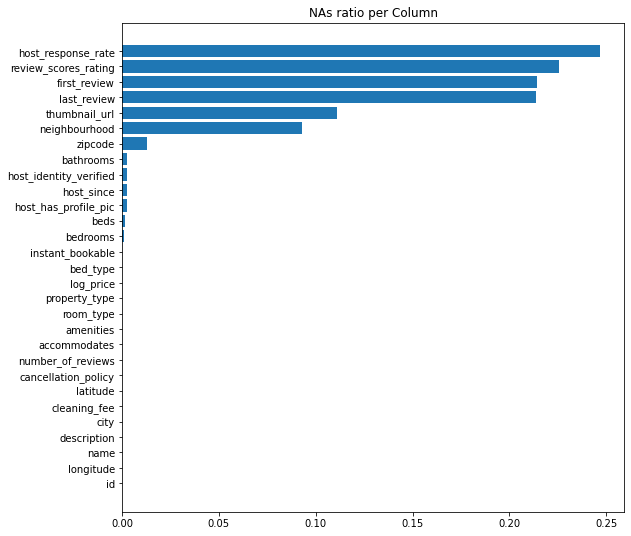

In [9]:
# Create a data frame
df = pd.DataFrame ({
        'column':  train_data_raw.isna().sum().index,
        'NAs': (train_data_raw.isna().sum()/train_data_raw.shape[0])
})

# Sort the table
df = df.sort_values(by=['NAs'])

# Initialize a Figure and an Axes
fig, ax = plt.subplots()

# Fig size
fig.set_size_inches(9,9)

# Create horizontal bars
ax.barh(y=df.column, width=df.NAs)

# Add title
ax.set_title('NAs ratio per Column')

# Clean Data

## Select and clean variables

I will build a class 'CleanData' that allows me to have control of the way in which i will clean each variable.

In 'normal' condition (not in a test proyect) each method would live in a separate file.

The main advantage of this is that if you want to add a new cleaning feature later on, the flow is not hindered.

In [10]:
class CleanData:
  def __init__(self, X):
    self.X = X
  
  # Drop 
  def drop_columns(self, drop_columns=None):
    """Drop columns in the list"""
    self.X = self.X.drop(columns=drop_columns)

  #def drop_nas(self, columns_drop_nas=None):
  #  """Drop columns in the list with Nas"""
  #  self.X = self.X.dropna(subset=columns_drop_nas)

  # Fill
  def fill_na_mean(self, columns_fill_na_mean):
    """Fill NAs with mean by columns in the list"""
    for column in columns_fill_na_mean:
      mean_column = self.X[column].median()
      self.X[column] = self.X[column].fillna(mean_column)

  def fill_na_median(self, columns_fill_na_median):
    """Fill NAs with median by columns in the list"""
    for column in columns_fill_na_median:
      median_column = self.X[column].median()
      self.X[column] = self.X[column].fillna(median_column)

  def fill_na(self, columns_fill_na):
    """Fill NAs with specific value by columns in the list"""
    for column, fill in columns_fill_na.items():
      self.X[column] = self.X[column].fillna(fill)

  # Replace
  def replace_str(self, columns_replace_values):
    """Replace values with specific string by columns in the list"""
    for column, kwargs in columns_replace_values.items():
      self.X[column] = self.X[column].str.replace(**kwargs)

  # Convert
  def to_boolean(self, columns_to_boolean):
    """Convert values to boolean that contains specific 
       conditional by columns in the list"""
    for column, true_value in columns_to_boolean.items():
      self.X[column] = (self.X[column] == true_value)

  def change_type(self, columns_change_type):
    """Convert values to specific by columns in the list"""
    for column, kwargs in columns_change_type.items():
      self.X[column]  = self.X[column].astype(**kwargs)

  # One hot
  def one_hot_coding(self):
    """Conver columns type 'object' to one hot coding, then
       delete leaving only the One hot coding"""
    dummies_object = None
    columns_type_object = []

    for i, column_type in enumerate([str(d) for d in self.X.dtypes]):
      if column_type == "object":
        column_name = self.X.columns[i]
        columns_type_object.append(column_name)

        dummies = pd.get_dummies(self.X[column_name], prefix=column_name)

        if dummies_object is None:
          dummies_object = dummies
        else:
          dummies_object = pd.concat([dummies_object, dummies], axis=1)

    self.X = self.X.drop(columns_type_object, axis='columns')
    self.X = pd.concat([self.X, dummies_object], axis=1)


  def clean(self, 
            columns_drop=None, 
            #columns_drop_nas=None,
            columns_fill_na_median=None, 
            columns_fill_na_mean=None,
            columns_fill_na=None,
            columns_replace_str_values=None,
            columns_to_boolean=None,
            columns_change_type=None):
            
    self.drop_columns(columns_drop)
    #self.drop_nas(columns_drop_nas)
    self.fill_na_median(columns_fill_na_median)
    self.fill_na_mean(columns_fill_na_mean)
    self.fill_na(columns_fill_na)
    self.replace_str(columns_replace_str_values)
    self.to_boolean(columns_to_boolean)
    self.change_type(columns_change_type)
    self.one_hot_coding()

In [11]:
columns_drop = ['id', 'description', 'first_review', 
                'host_has_profile_pic', 'host_since', 'last_review', 
                'name', 'neighbourhood','amenities', 'thumbnail_url',
                'latitude','longitude', 'zipcode']

# why delete these columns?
# 'id', 'host_has_profile_pic', 'thumbnail_url', 'name' are irreleavnet
# 'description' they have 73479 unique values
# 'first_review', 'host_since', 'last_review'  are time series features for this project we will omit
# 'neighbourhood', 'latitude', 'longitude', 'zipcode' for this proyect ovoid location especific features
# for 'amenities' in other time we can separete and count how many amenities have by house


In [12]:

columns_fill_na_median = ['bedrooms', 'bathrooms', 'beds']
# Why?
# I think almost have one bedrooms, one bathrooms and one bed 
# for the 3 vars one is the median (and thats is a integer)

columns_fill_na_mean = ['review_scores_rating']
# Why?
# The mean is to close to the median and is too close to the 3 quartile,
# i have no problem with a bias 

columns_fill_na = {'host_identity_verified': 't',
                   'host_response_rate': '0',
                   }
# Why?
# For 'host_identity_verified' only the 0.253% is NA and the 
# most popular is 't'
# For 'host_response_rate' i am assuming that by not having a 
# response rate then it will be zero


In [13]:

columns_replace_str_values = {'host_response_rate': {'pat':'%',
                                                     'repl':''}
                              }
# Why?
# we remove the percentage character so that we can later convert to integer 


In [14]:

columns_to_boolean = {'host_identity_verified': 't',
                      'instant_bookable': 't'
                      }
                    
# Why?
# If is equal to 't' convert to True if not False

columns_change_type = { 'host_response_rate': {'dtype':int}}

# Why?
# Now 'host_response_rate' change to integer


In [15]:
X_clean = CleanData(train_data_raw)
X_clean.clean(columns_drop=columns_drop,
              #columns_drop_nas=columns_drop_nas,
              columns_fill_na_median=columns_fill_na_median, 
              columns_fill_na_mean=columns_fill_na_mean,
              columns_fill_na=columns_fill_na,
              columns_replace_str_values=columns_replace_str_values,
              columns_to_boolean=columns_to_boolean,
              columns_change_type=columns_change_type)

Now the data looks like

In [16]:
X_clean.X.columns

Index(['log_price', 'accommodates', 'bathrooms', 'cleaning_fee',
       'host_identity_verified', 'host_response_rate', 'instant_bookable',
       'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds',
       'property_type_Apartment', 'property_type_Bed & Breakfast',
       'property_type_Boat', 'property_type_Boutique hotel',
       'property_type_Bungalow', 'property_type_Cabin',
       'property_type_Camper/RV', 'property_type_Casa particular',
       'property_type_Castle', 'property_type_Cave', 'property_type_Chalet',
       'property_type_Condominium', 'property_type_Dorm',
       'property_type_Earth House', 'property_type_Guest suite',
       'property_type_Guesthouse', 'property_type_Hostel',
       'property_type_House', 'property_type_Hut', 'property_type_In-law',
       'property_type_Island', 'property_type_Lighthouse',
       'property_type_Loft', 'property_type_Other',
       'property_type_Parking Space', 'property_type_Serviced apartment',
       'property_t

In [17]:
X_clean.X.dtypes

log_price                 float64
accommodates                int64
bathrooms                 float64
cleaning_fee                 bool
host_identity_verified       bool
                           ...   
city_Chicago                uint8
city_DC                     uint8
city_LA                     uint8
city_NYC                    uint8
city_SF                     uint8
Length: 65, dtype: object

In [18]:
#Not more NAs
print( f'Number of features whith NAs {sum(X_clean.X.isna().sum() > 0)}')

Number of features whith NAs 0


## Last variable selection

Once our data has been transformed, it only remains to analyze which variables are relevant for our dependent variable 'log_price'

<AxesSubplot:>

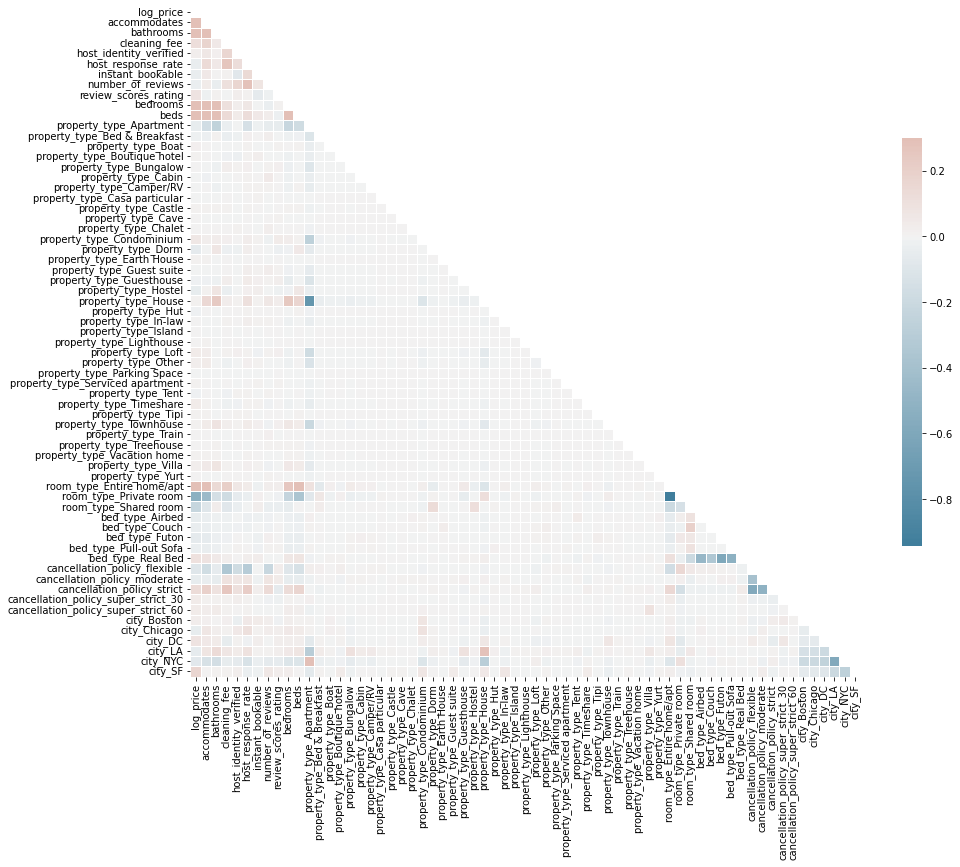

In [19]:
# Compute the correlation matrix
corr = X_clean.X.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [20]:
corr['log_price']

log_price                 1.000000
accommodates              0.567574
bathrooms                 0.355174
cleaning_fee              0.111191
host_identity_verified    0.024014
                            ...   
city_Chicago             -0.051902
city_DC                   0.082282
city_LA                  -0.056585
city_NYC                 -0.076958
city_SF                   0.166738
Name: log_price, Length: 65, dtype: float64

Now we will only find those variables that have a positive correlation above 0.5 and and correlation below -0.5
compared with 'log_price'

In [21]:
vars_relevant = corr['log_price'][((corr['log_price'] >= .05) | (corr['log_price'] <=  -.05))]
vars_relevant

log_price                       1.000000
accommodates                    0.567574
bathrooms                       0.355174
cleaning_fee                    0.111191
review_scores_rating            0.084180
bedrooms                        0.473028
beds                            0.441953
property_type_Condominium       0.065726
property_type_Dorm             -0.063270
room_type_Entire home/apt       0.602500
room_type_Private room         -0.531648
room_type_Shared room          -0.222487
bed_type_Airbed                -0.050427
bed_type_Futon                 -0.064557
bed_type_Real Bed               0.099230
cancellation_policy_flexible   -0.095866
cancellation_policy_moderate   -0.050016
cancellation_policy_strict      0.128814
city_Chicago                   -0.051902
city_DC                         0.082282
city_LA                        -0.056585
city_NYC                       -0.076958
city_SF                         0.166738
Name: log_price, dtype: float64

# Model

In [22]:
# All relevants variables except 'log_price'
X = X_clean.X[list(vars_relevant.index.values)[1:] ]
# Only our variable object (log_price)
y = X_clean.X.loc[:, 'log_price']

In [23]:
X.head()

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,property_type_Condominium,property_type_Dorm,room_type_Entire home/apt,room_type_Private room,...,bed_type_Futon,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,city_Chicago,city_DC,city_LA,city_NYC,city_SF
0,3,1.0,True,100.0,1.0,1.0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
1,7,1.0,True,93.0,3.0,3.0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
2,5,1.0,True,92.0,1.0,3.0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
3,4,1.0,True,96.0,2.0,2.0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,1
4,2,1.0,True,40.0,0.0,1.0,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0


In [24]:
# Split data into train and test sets and set the seed by repeatability
seed = 7
test_size = 0.33


I will create the 'Model' class in which it will be faster for us to adjust and make the prediction for different models.

We will have the option to chooise the model and make its adjustment or adjust by gridsearchcv with its corresponding parameters.

In [25]:
class Model:
  def __init__(self, model):
    self.model = model
    self.X_train = None
    self.y_train = None
    self.X_test = None
    self.y_test = None
    self.y_pred_train = None
    self.y_pred_test = None
    self.grid_model = None
    self.test_score = None
    self.train_score_log = None
    self.test_score_log = None
    self.fit_model = None
    self.metric_score = None

  def data_split(self, X, y, test_size, seed=2021):
    """Split data"""
    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

  def yhat_predict(self):
    """Predict the yhat"""
    self.yhat_train = self.fit_model.predict(self.X_train)
    self.yhat_test = self.fit_model.predict(self.X_test)

  #def error_calc(self, metric):
  #  self.metric_score = metric

  def model_gridsearchcv(self, grid, X, y, test_size):
    self.data_split(X, y, test_size)
    self.model = GridSearchCV(estimator=self.model, **grid)
    self.fit_model = self.model.fit(self.X_train, self.y_train)

  def model_fit(self, X, y, test_size, seed):
    self.data_split(X, y, test_size, seed)
    self.fit_model = self.model.fit(self.X_train, self.y_train)

  def write_model(self, path):
    """Predict the yhat"""
    joblib.dump(self.fit_model, path)

## Baseline LinearRegression

We need a baseline to know if each selected model really improves the prediction or not.

For this task we will resort to the basic but powerful linear regression.

In [26]:
linear_reg = Model(LinearRegression())
linear_reg.model_fit(X, y, test_size, seed=seed)
linear_reg.yhat_predict()

In [27]:
rmse_linear_reg = mean_squared_error(linear_reg.y_test, linear_reg.yhat_test, squared=False)

print(f"The RMSE for rmse_linear_reg is: {rmse_linear_reg}")

The RMSE for rmse_linear_reg is: 0.4758057163838125


Ok, once we have established our base line, it is time to apply GridSearchCV to iterate through different options.

## XGBRegressor model

In [28]:
grid = { "param_grid":{'max_depth': [ 3, 6,10],
                       'learning_rate': [0.01, 0.05, 0.1, .3, .5],
                       'n_estimators': [100, 500, 1000],
                       'colsample_bytree': [ 0.7, .5]},
        'scoring':'neg_mean_squared_error',
        'verbose':6,
        'n_jobs':-1
        }
        
xgb_reg = Model(XGBRegressor(seed = 20))
xgb_reg.model_gridsearchcv(grid, X, y, test_size = 0.33)
xgb_reg.yhat_predict()

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [29]:
xgb_reg.model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.01,
 'max_depth': 6,
 'n_estimators': 1000}

In [30]:
rmse_xgb_reg = mean_squared_error(xgb_reg.y_test, xgb_reg.yhat_test, squared=False)

print(f"The RMSE for xgb_reg is: {rmse_xgb_reg}")

The RMSE for xgb_reg is: 0.45378368048713524


## Lasso model

In [31]:
grid = { "param_grid":{'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]},
        'scoring':'neg_mean_squared_error',
        'verbose':6,
        'n_jobs':-1
        }

lasso = Model(Lasso())
lasso.model_gridsearchcv(grid, X, y, test_size = 0.33)
lasso.yhat_predict()


Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [32]:
lasso.model.best_params_

{'alpha': 0.02}

In [33]:
rmse_lasso = mean_squared_error(lasso.y_test, lasso.yhat_test, squared=False)

print(f"The RMSE for rmse_lasso is: {rmse_lasso}")

The RMSE for rmse_lasso is: 0.5010996440520167


## MLPRegressor Model

In [34]:

grid = { "param_grid":{'activation': ['relu', 'tanh', 'logistic', 'identity'],
                       'hidden_layer_sizes':[6,6,6],
                       'solver': ['adam', 'lbfgs'],
                       'learning_rate' : ['constant', 'adaptive', 'invscaling']
         },
        'scoring':'neg_mean_squared_error',
        'verbose':6,
        'n_jobs':-1
        }
        
mlpregre = Model(MLPRegressor(random_state=1, max_iter=500))
mlpregre.model_gridsearchcv(grid, X, y, test_size = 0.33)
mlpregre.yhat_predict()


Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [35]:
mlpregre.model.best_params_


{'activation': 'logistic',
 'hidden_layer_sizes': 6,
 'learning_rate': 'constant',
 'solver': 'lbfgs'}

In [36]:
rmse_mlpregre = mean_squared_error(mlpregre.y_test, mlpregre.yhat_test, squared=False)

print(f"The RMSE for rmse_mlpregre is: {rmse_mlpregre}")

The RMSE for rmse_mlpregre is: 0.4784236106338095


# Model vs Model

In [37]:
df = pd.DataFrame(data={'Model': ['linear_reg', 'xgb_reg', 'lasso', 'mlpregre'], 
                        'RMSE': [rmse_linear_reg, rmse_xgb_reg, rmse_lasso, rmse_mlpregre]})

df.sort_values('RMSE')

,Model,RMSE
1,xgb_reg,0.453784
0,linear_reg,0.475806
3,mlpregre,0.478424
2,lasso,0.501100


Having a better RMSE XGBRegressor is the selected model.

Perhaps the difference between each model is not very wide, however, as our objective variable is on a logarithmic scale, each small point is translated into points of magnitude.

In [38]:
# Write model 
xgb_reg.write_model('../xgboost_final_model.pkl')

# Test data predict

Now is time to predict the test data

In [39]:
test_data_raw.shape

(25458, 28)

In [40]:
X_clean_test = CleanData(test_data_raw)
X_clean_test.clean(columns_drop=columns_drop,
              columns_fill_na_median=columns_fill_na_median, 
              columns_fill_na_mean=columns_fill_na_mean,
              columns_fill_na=columns_fill_na,
              columns_replace_str_values=columns_replace_str_values,
              columns_to_boolean=columns_to_boolean,
              columns_change_type=columns_change_type
              )



X_test = X_clean_test.X

## Sanity check

In [41]:
X_test.isna().sum()
# No NAs

accommodates                           0
bathrooms                              0
cleaning_fee                           0
host_identity_verified                 0
host_response_rate                     0
instant_bookable                       0
number_of_reviews                      0
review_scores_rating                   0
bedrooms                               0
beds                                   0
property_type_Apartment                0
property_type_Bed & Breakfast          0
property_type_Boat                     0
property_type_Boutique hotel           0
property_type_Bungalow                 0
property_type_Cabin                    0
property_type_Camper/RV                0
property_type_Castle                   0
property_type_Cave                     0
property_type_Chalet                   0
property_type_Condominium              0
property_type_Dorm                     0
property_type_Earth House              0
property_type_Guest suite              0
property_type_Gu

## Predict Test data

In [42]:
# All relevants variables except 'log_price'
X_test = X_test[list(vars_relevant.index.values)[1:]]

In [43]:
print(f"Number rows: {X_test.shape[0]} Number columns: {X_test.shape[1]}")

Number rows: 25458 Number columns: 22


In [44]:
xgb_reg.fit_model.predict(X_test)

array([4.2683635, 4.9118485, 4.526333 , ..., 4.6689987, 5.0807567,
       4.301012 ], dtype=float32)

## Final result

In [45]:
test_log_price = pd.DataFrame(data={'id': test_data_raw['id'], 
                                    'log_price': xgb_reg.model.predict(X_test)})

test_log_price

,id,log_price
0,3895911,4.268363
1,9710289,4.911849
2,9051635,4.526333
3,708374,4.433509
4,626296,5.029624
...,...,...
25453,13098256,5.786149
25454,13550830,4.238314
25455,13899483,4.668999
25456,9939029,5.080757


In [46]:
test_log_price.to_csv("../submission.csv", index=False)